# Descriptive Analytics using winequality dataset
## Authors: Agata Dratwa

# Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# setting default size of plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")

# Load and merge datasets

In [2]:
# reading red and white wine dataset
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

# adding wine type variable
white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'

In [3]:
# adding quality label to white wine set
white_wine['quality_label'] = white_wine['quality'].apply(lambda x : 'low' if x < 5 else 'high' if x >= 7  else 'medium')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  wine_type             4898 non-null   object  
 13  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [4]:
# adding quality label to red wine set
red_wine['quality_label'] = red_wine['quality'].apply(lambda x : 'low' if x < 5 else 'high' if x >= 7  else 'medium')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  wine_type             1599 non-null   object  
 13  quality_label         1599 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [5]:
# connecting datasets
wines = pd.concat([white_wine, red_wine])
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,medium
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,medium
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,medium
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,medium


In [6]:
# shuffeling data
wines = wines.sample(frac=1, random_state=1)

# Understand dataset features and values

In [7]:
# print head of dataset as a help and then read the dataset description below
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,red,high
3464,6.9,0.29,0.41,7.8,0.046,52.0,171.0,0.99537,3.12,0.51,9.6,5,white,medium
1518,8.4,0.23,0.49,7.8,0.035,22.0,95.0,0.99350,3.04,0.34,12.0,6,white,medium
3761,6.1,0.17,0.28,2.5,0.028,22.0,98.0,0.99072,3.16,0.37,11.1,7,white,high


### Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Understanding Wine Attributes and Properties 


- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


- **wine_type:** Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


- **quality_label:** This is a derived attribute from the `quality` attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes. 

# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

Let’s do a quick basic descriptive summary statistics on some of these attributes of interest.

In [8]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [9]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3772 to 259
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memor

In [10]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                  Medium Quality Wine  \
               alcohol volatile acidity      pH quality             alcohol   
count           246.00           246.00  246.00  246.00             4974.00   
mean             10.18             0.47    3.23    3.88               10.27   
std               1.00             0.25    0.19    0.33                1.07   
min               8.00             0.11    2.74    3.00                8.00   
25%               9.40             0.28    3.09    4.00                9.40   
50%              10.05             0.38    3.22    4.00               10.00   
75%              10.90             0.61    3.36    4.00               11.00   
max              13.50             1.58    3.90    4.00               14.90   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          4974.00  4974.00  4974.00           1277.00          1277.00   
mean              0.35     3.22     5.57             11.43             0.29   
std               0.17     0.16     0.50              1.22             0.12   
min               0.08     2.72     5.00              8.50             0.08   
25%               0.23     3.11     5.00             10.70             0.20   
50%               0.30     3.20     6.00             11.50             0.27   
75%               0.42     3.32     6.00             12.40             0.34   
max               1.33     4.01     6.00             14.20             0.92   

                         
            pH  quality  
count  1277.00  1277.00  
mean      3.23     7.16  
std       0.16     0.38  
min       2.84     7.00  
25%       3.12     7.00  
50%       3.22     7.00  
75%       3.34     7.00  
max       3.82     9.00

# Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension).

## Visualizing one dimension

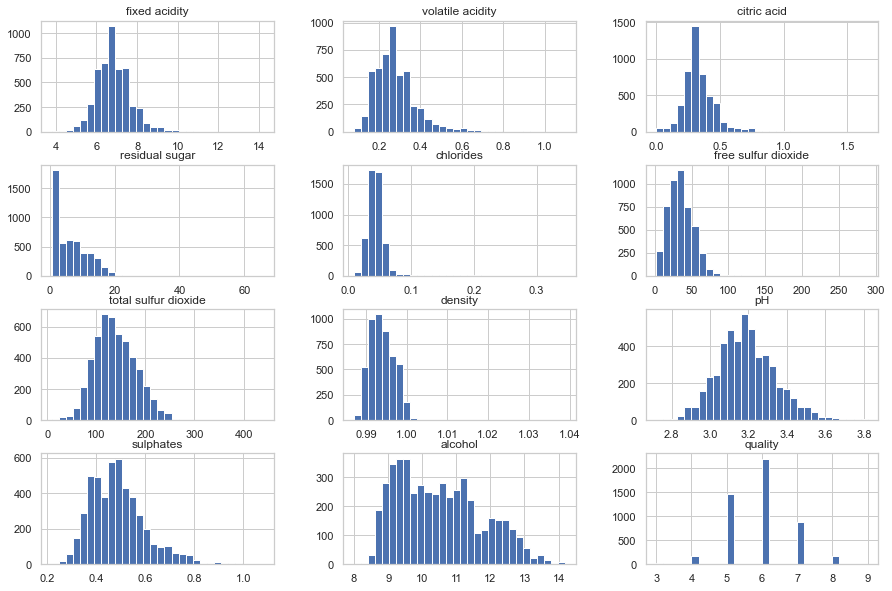

In [11]:
# plotting white_wine histograms
plot_white_wine = white_wine.hist(bins=30, figsize=(15, 10))


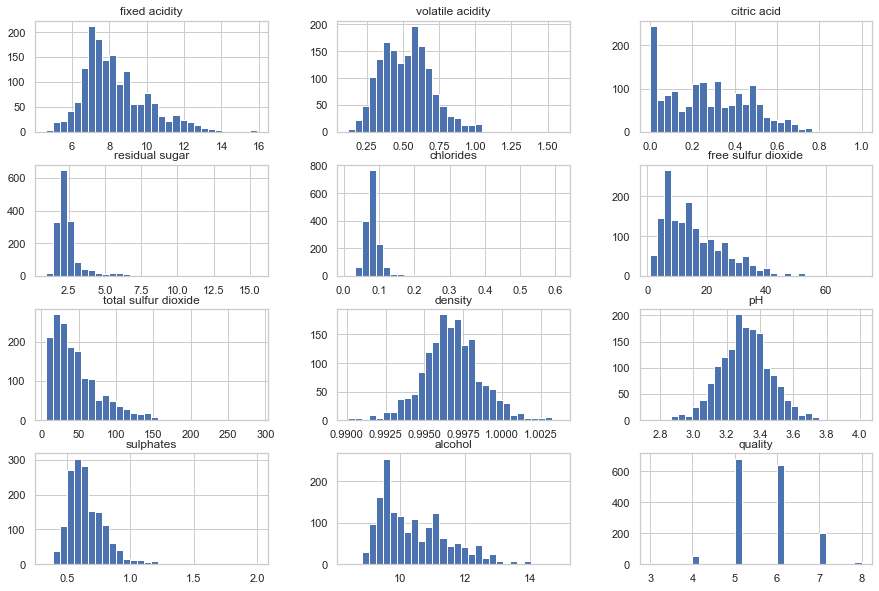

In [12]:
# plotting red_wine histograms
plot_red_wine = red_wine.hist(bins=30, figsize=(15, 10))

### Continuous, numeric attribute in 1-D

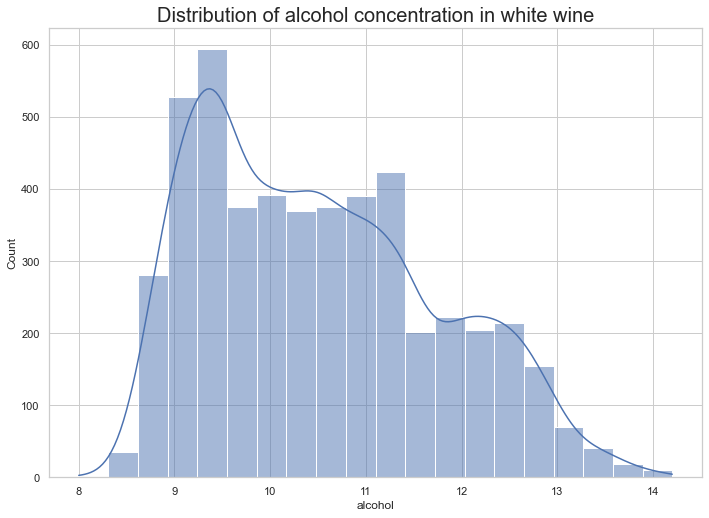

In [13]:
# hisotogram of alcohol atribute from white wine dataset
alcohol_hist = sns.histplot(data=white_wine, x='alcohol', kde=True, bins=20)
alcohol_hist.axes.set_title('Distribution of alcohol concentration in white wine', fontsize=20)
plt.show()

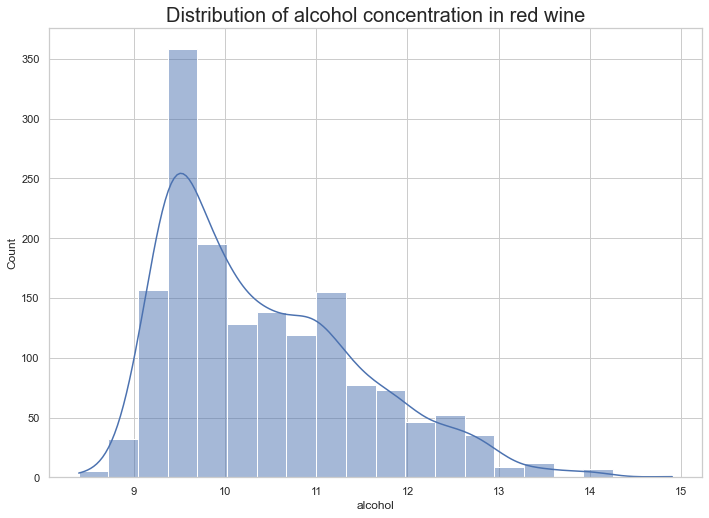

In [14]:
# hisotogram of alcohol atribute from red wine dataset
sns.histplot(data=red_wine, x='alcohol', kde=True, bins=20)
plt.title('Distribution of alcohol concentration in red wine', fontsize=20)
plt.show()

### Discrete, categorical attribute in 1-D

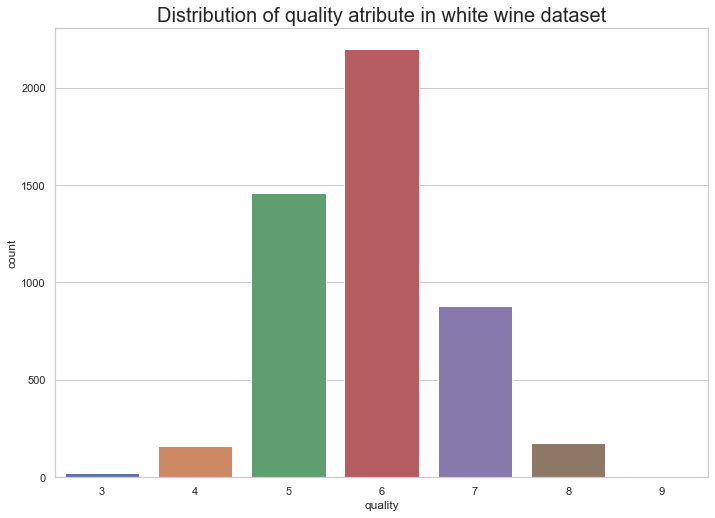

In [15]:
sns.countplot(data=white_wine, x='quality')
plt.title('Distribution of quality atribute in white wine dataset', fontsize=20)
plt.show()

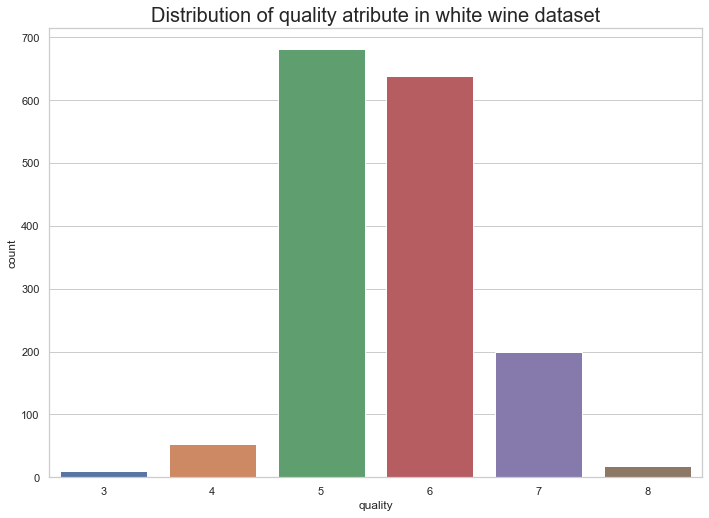

In [16]:
sns.countplot(data=red_wine, x='quality')
plt.title('Distribution of quality atribute in white wine dataset', fontsize=20)
plt.show()

# Multivariate Analysis

Multivariate analysis is where the fun as well as the complexity begins. Here we analyze multiple data dimensions or attributes (2 or more). Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes.

## Visualizing two dimensions

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix (pandas `corr`) and depict it as a seaborn `heatmap`.

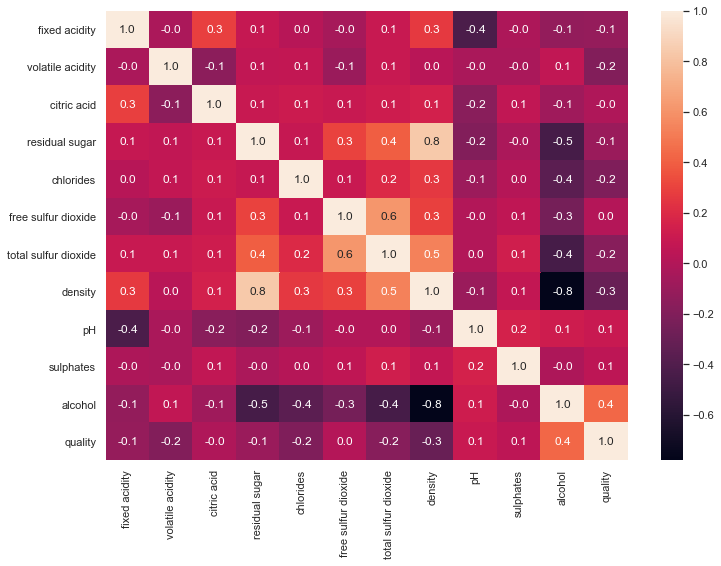

In [17]:
cor = white_wine.corr()
sns.heatmap(cor, annot=True, fmt=".1f")
plt.show()

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

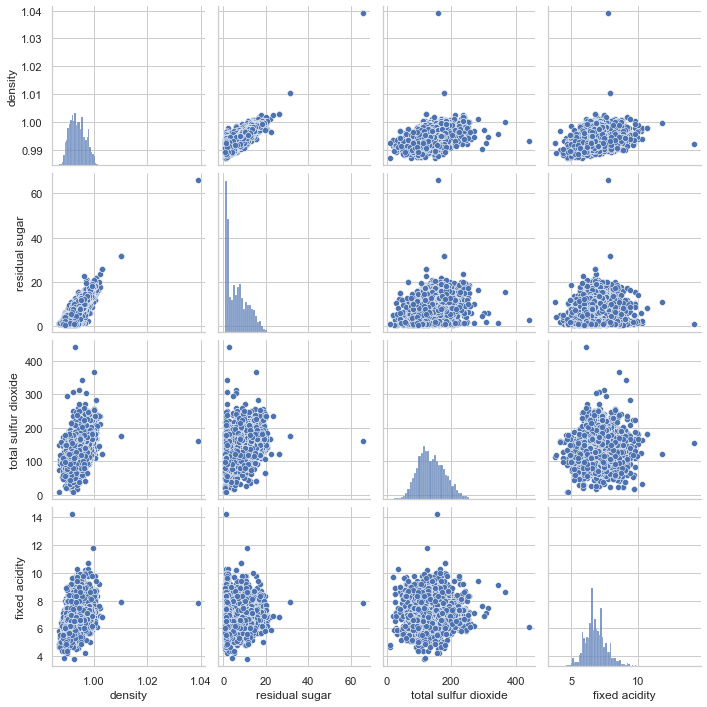

In [18]:
# pairplot of white wine 
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
sns.pairplot(white_wine[cols])
plt.show()

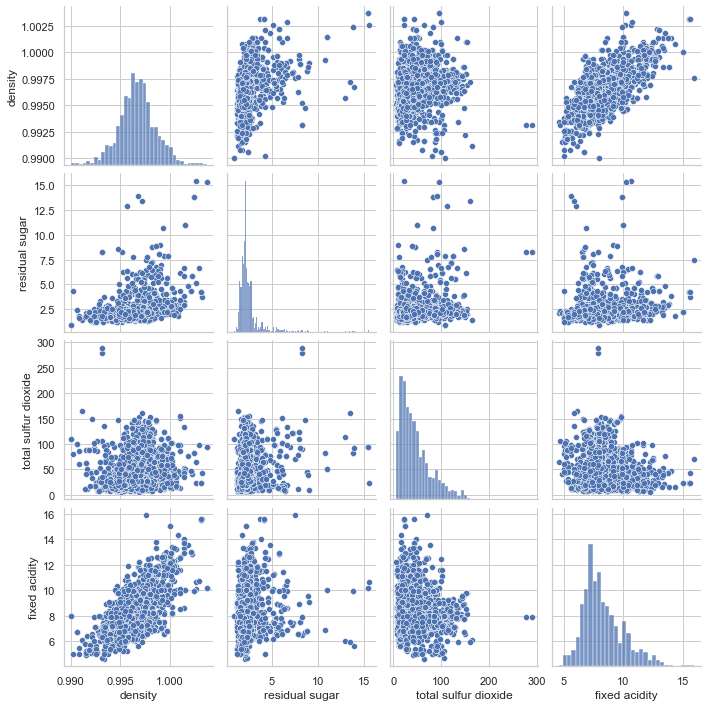

In [19]:
# pairplot of red wine 
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
sns.pairplot(red_wine[cols])
plt.show()

In [100]:
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

# creating new scaled white wine dataset
wines_standarize = wines.copy()
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']

scaler = StandardScaler()
wines_standarize[cols] = scaler.fit_transform(wines[cols])
wines_standarize.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
3772,-0.706073,0.24,0.29,1.735549,0.035,53.0,0.323005,0.324624,3.17,0.38,10.6,6,white,medium
1111,-1.400339,0.42,0.27,-0.723758,0.092,23.0,-1.074792,0.004458,3.78,0.64,12.3,7,red,high
3464,-0.243230,0.29,0.41,0.495385,0.046,52.0,0.977669,0.224572,3.12,0.51,9.6,5,white,medium
1518,0.913879,0.23,0.49,0.495385,0.035,22.0,-0.367047,-0.399085,3.04,0.34,12.0,6,white,medium
3761,-0.860355,0.17,0.28,-0.618660,0.028,22.0,-0.313966,-1.326233,3.16,0.37,11.1,7,white,high


<AxesSubplot:>

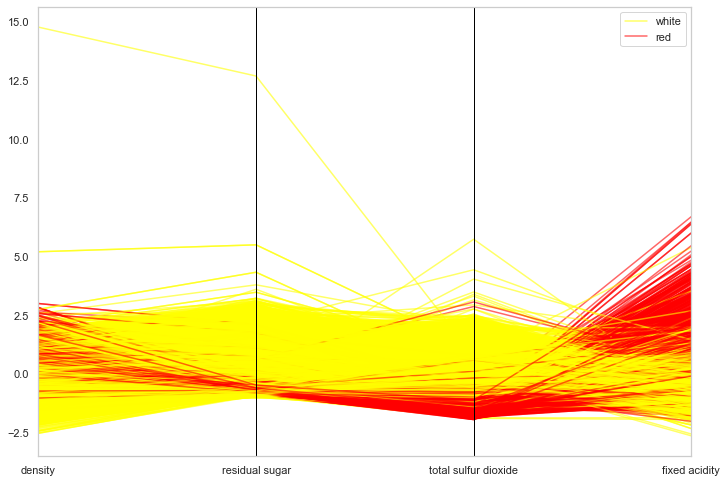

In [102]:
# parallel_coordinates plot for white wine
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
wines_standarize = wines_standarize[cols]
parallel_coordinates(wines_standarize, 'wine_type', color=('yellow', 'red'), alpha=0.6)

### Two Continuous Numeric attributes 

To visualize two continuous, numeric attributes, we can use scatter plots and joint plots. The second one in particular are good to not only check for patterns, relationships but also see the individual distributions for the attributes.


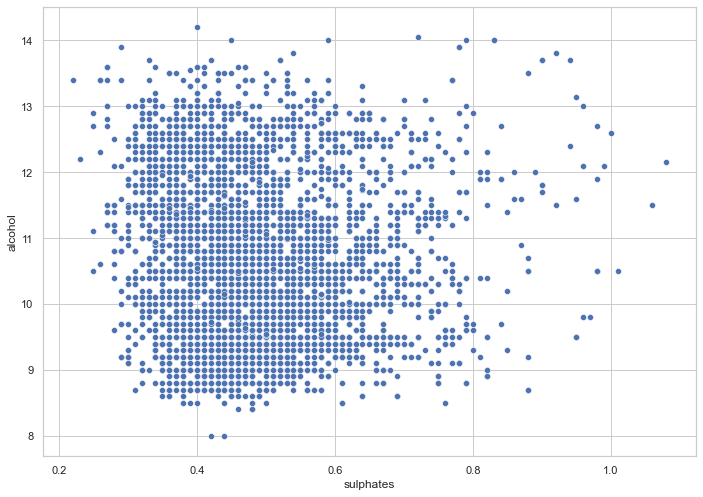

In [22]:
# scatter plot of sulphates and alcohol - white wine dataset
sns.scatterplot(data=white_wine, x="sulphates", y="alcohol")
plt.show()

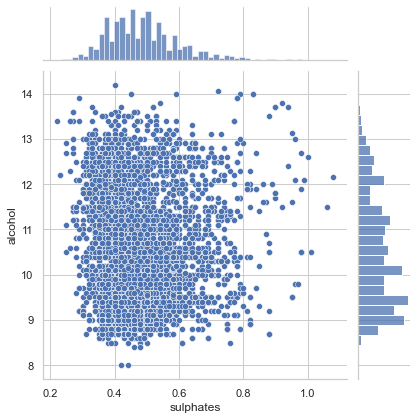

In [23]:
# joint plot of sulphates and alcohol - white wine dataset
sns.jointplot(data=white_wine, x="sulphates", y="alcohol")
plt.show()

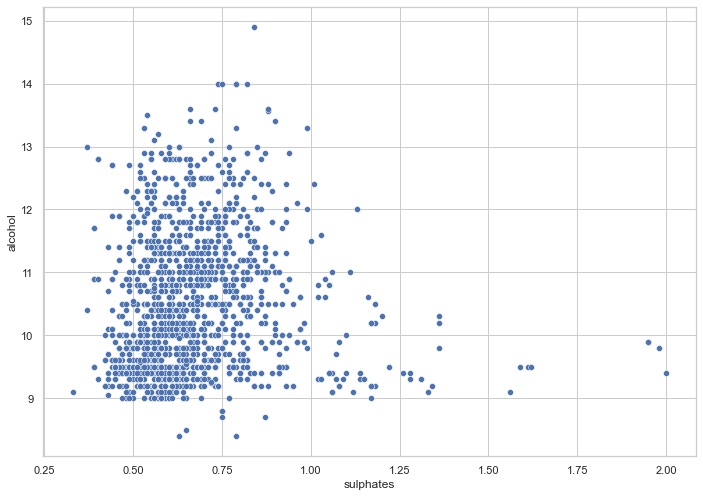

In [24]:
# scatter plot of sulphates and alcohol - red wine dataset
sns.scatterplot(data=red_wine, x="sulphates", y="alcohol")
plt.show()

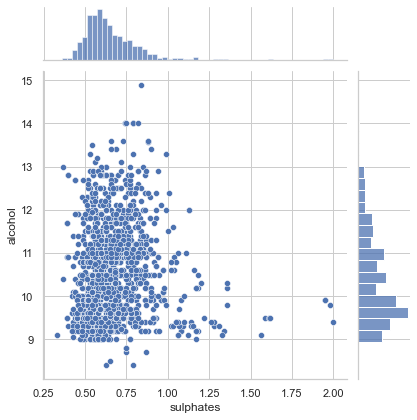

In [25]:
# joint plot of sulphates and alcohol - red wine dataset
sns.jointplot(data=red_wine, x="sulphates", y="alcohol")
plt.show()

### Two Discrete Categorical attributes 

To visualize two discrete, categorical attributes we can leverage separate plots (subplots) or facets for one of the categorical dimensions.



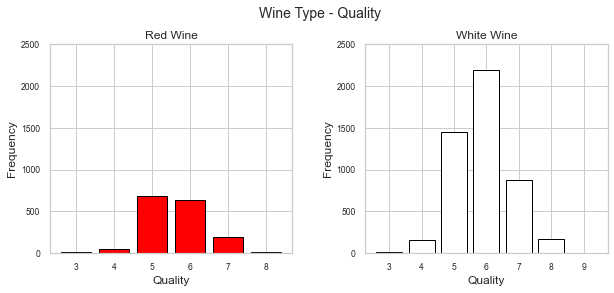

In [26]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

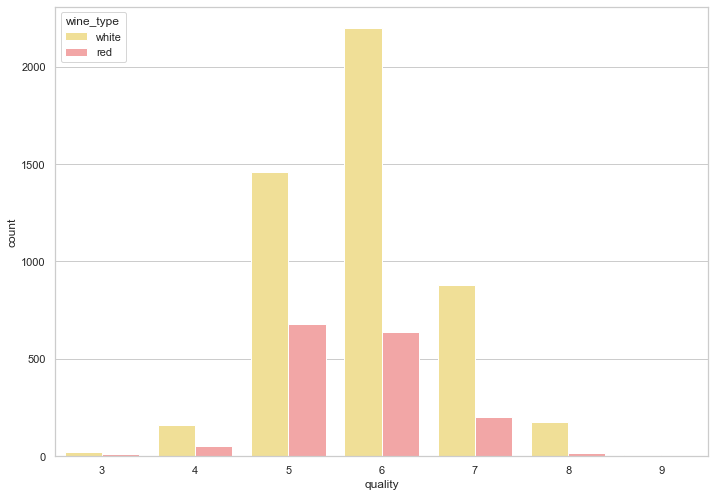

In [27]:
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (numeric & categorical)

To visualize mixed attributes in two-dimensions (essentially numeric and categorical together), we cab use faceting\subplots along with generic histograms or density plots.


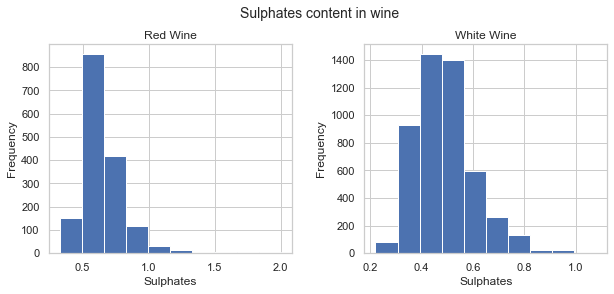

In [28]:
# histograms of sulphates content in wine
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates content in wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
bar1 = ax1.hist(red_wine['sulphates'])


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency") 
bar1 = ax2.hist(white_wine['sulphates'])

Box plots are effective in depicting groups of numeric data based on the different values in the categorical attribute. Additionally, they are a good way to know the quartile values in the data and also potential outliers.


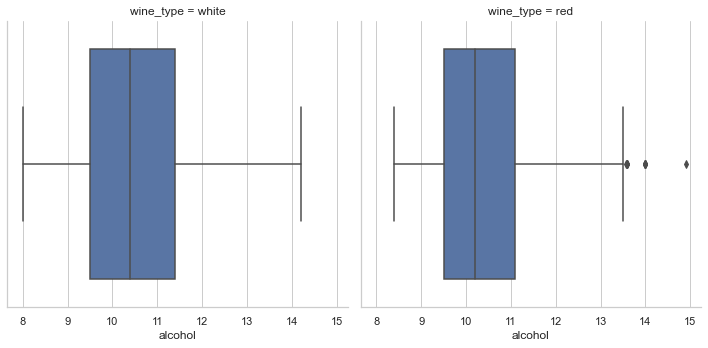

In [29]:
# boxplots of alcohol content for different types of wine
g = sns.FacetGrid(wines, col="wine_type", height=5)
g.map(sns.boxplot, "alcohol", order=["white", "red"])
plt.show()


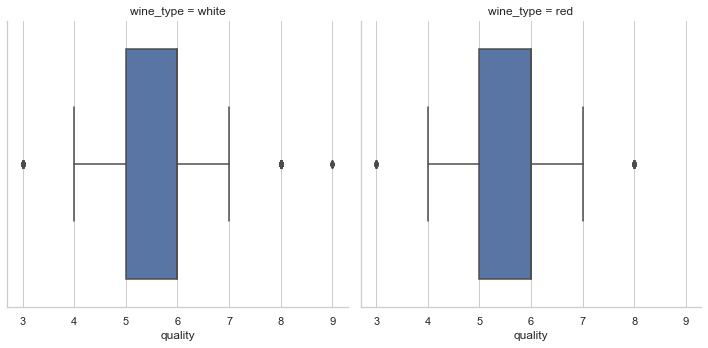

In [30]:
# boxplots of quality of wine for different types of wine
g = sns.FacetGrid(wines, col="wine_type", height=5)
g.map(sns.boxplot, "quality", order=["white", "red"])
plt.show()

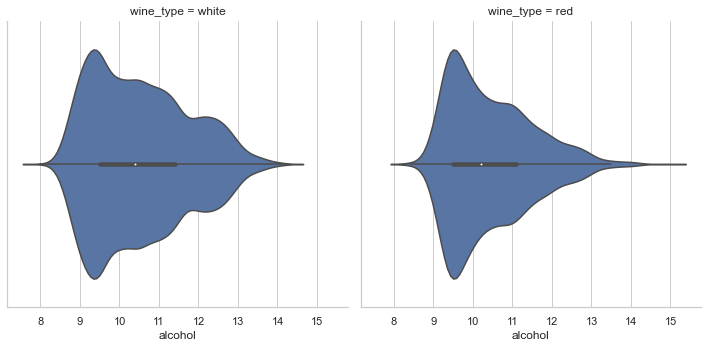

In [31]:
# violinplots of alcohol content for different types of wine
g = sns.FacetGrid(wines, col="wine_type", height=5)
g.map(sns.violinplot, "alcohol", order=["white", "red"])
plt.show()

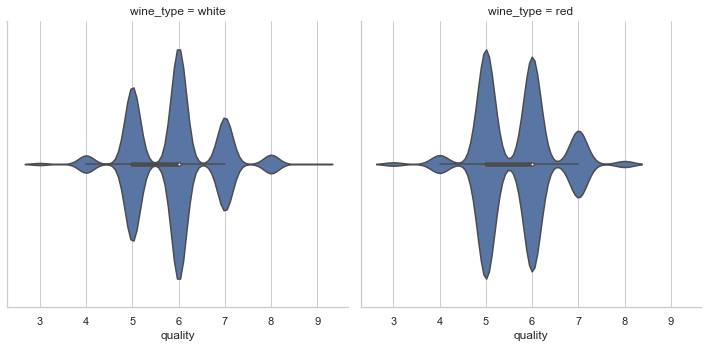

In [32]:
# violinplots of quality of wine for different types of wine
g = sns.FacetGrid(wines, col="wine_type", height=5)
g.map(sns.violinplot, "quality", order=["white", "red"])
plt.show()

## Visualizing three dimensions

We can visualize them by considering a pair-wise scatter plot and introducing the notion of color or hue to separate out values in a categorical dimension.


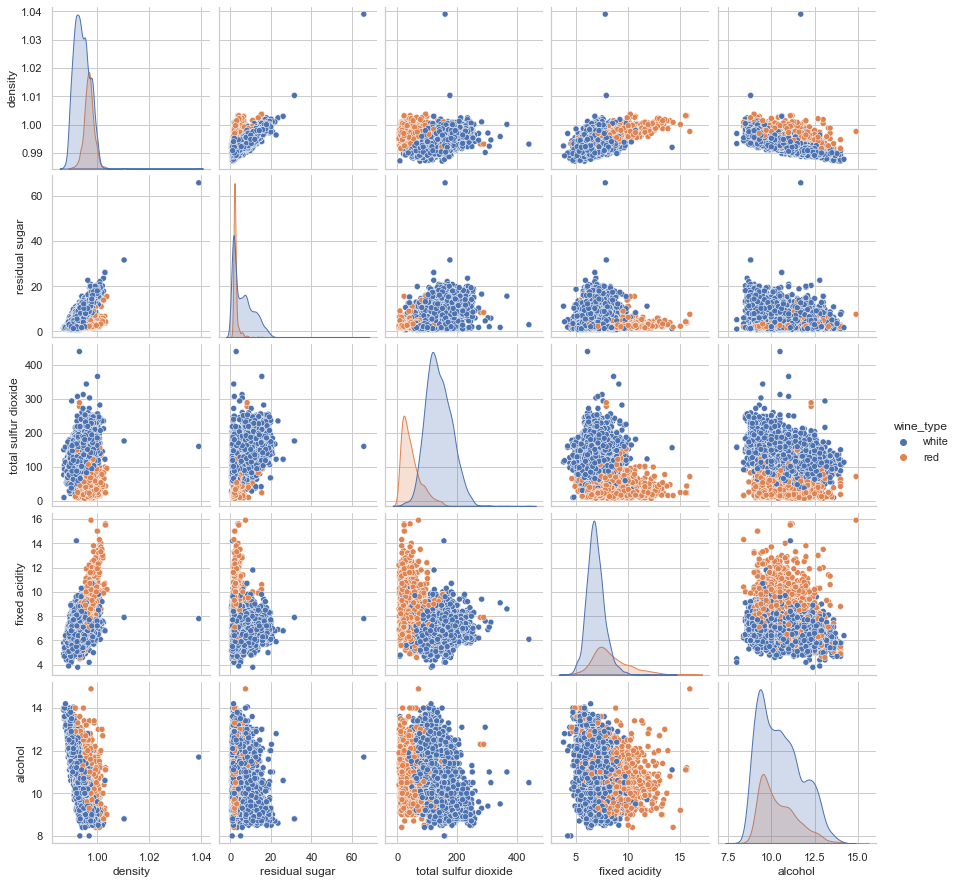

In [33]:
sns.pairplot(wines, vars=['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'alcohol'], hue="wine_type")

### Three Continuous Numeric attributes

Text(0.5, 0, 'Alcohol')

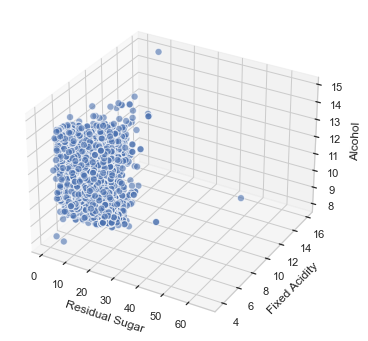

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')


We can utilize size as the third dimension, where the size of the dots indicate the quantity of the third dimension.


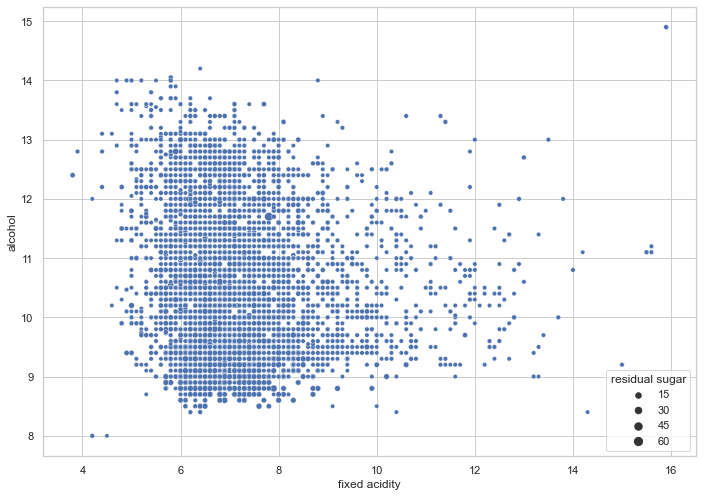

In [35]:
sns.scatterplot(data=wines, x='fixed acidity', y='alcohol', size='residual sugar')
plt.show()

### Three Discrete Categorical attributes

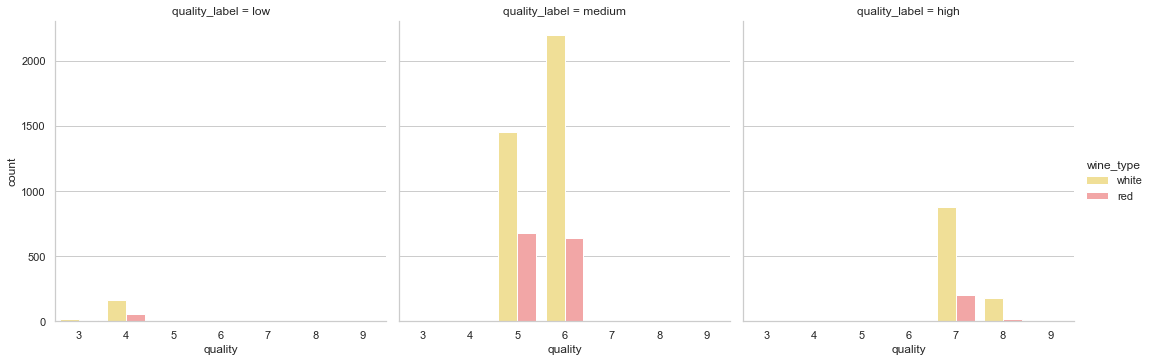

In [36]:
fc = sns.catplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (Numeric & Categorical)

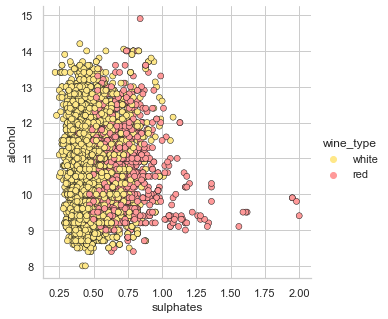

In [37]:
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], height=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

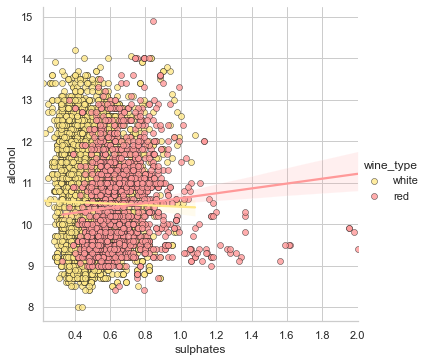

In [62]:
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

Thus hue acts as a good separator for the categories or groups and while there is no or very weak correlation as observed above, we can still understand from these plots that `sulphates` are slightly higher for red wines as compared to white. 


<AxesSubplot:xlabel='sulphates', ylabel='alcohol'>

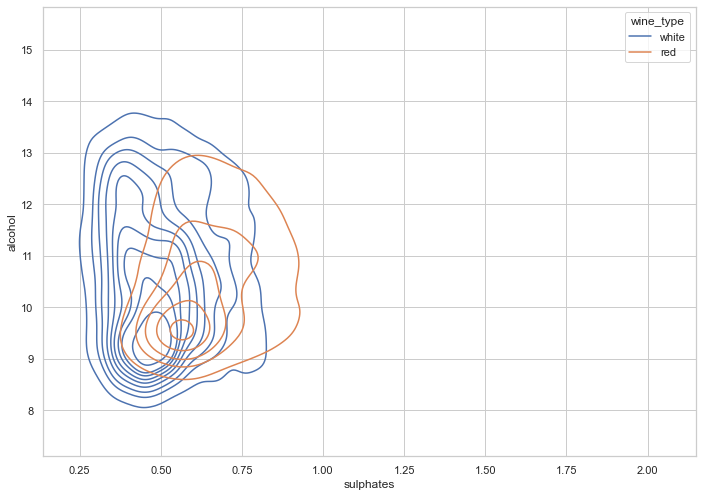

In [39]:
sns.kdeplot(data=wines, x="sulphates", y="alcohol", hue="wine_type")

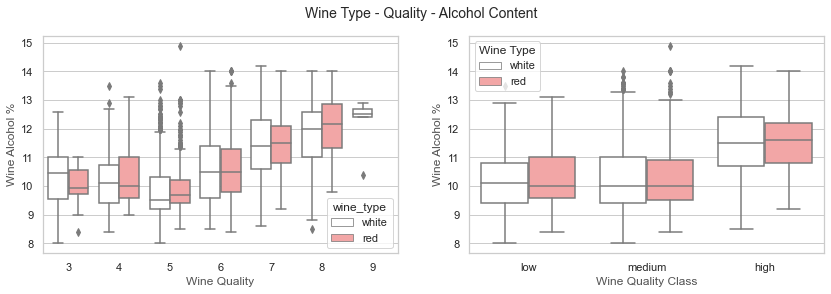

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

## Visualizing four dimensions

We will leverage various components of the charts visualize multiple dimensions. One way to visualize data in four dimensions is to use `depth` and `hue` as specific data dimensions in a conventional plot like a scatter plot.



Text(0.5, 0, 'Fixed Acidity')

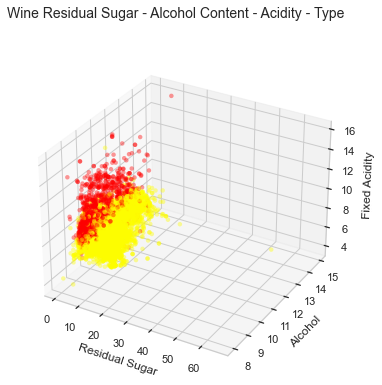

In [57]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Another strategy is to keep a 2-D plot but use hue and data point size as data dimensions. Typically this would be a bubble chart similar to what we visualized earlier. 

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

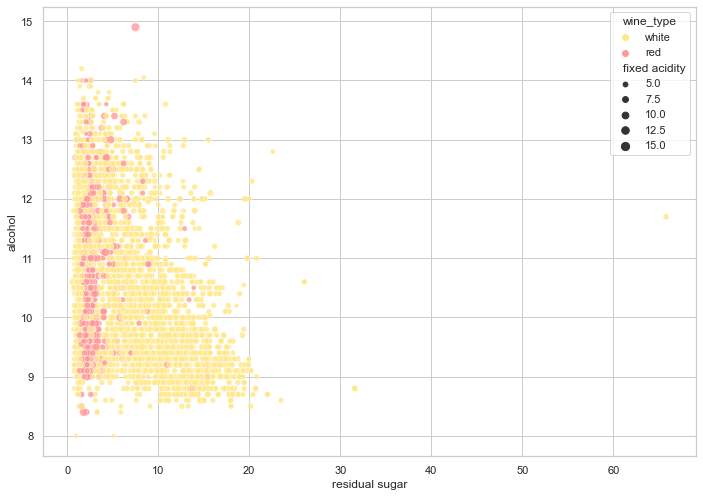

In [63]:
sns.scatterplot(data=wines, x='residual sugar', y='alcohol', hue='wine_type',
                palette={"red": "#FF9999", "white": "#FFE888"}, size='fixed acidity',
               legend=True, alpha=0.8)

If we have more that two categorical attributes to represent, we can reuse our concept of leveraging hue and facets to depict these attributes and regular plots like scatter plots to represent the numeric attributes. Use `FaceGrid` to plot a 4-D mix data using scatter plots leveraging the concepts of hue and facets for > 1 categorical attributes. Use `map` method of the `FaceGrid` object. Compare different attributes. For example "volatile acidity", "alcohol" and "volatile acidity", "total sulfur dioxide".

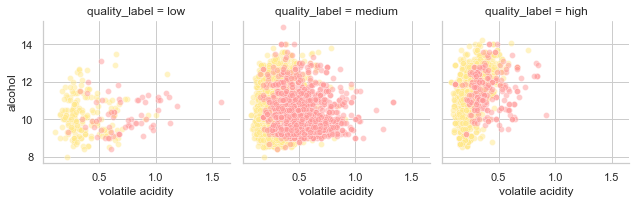

In [83]:
plot = sns.FacetGrid(data=wines, col='quality_label', hue='wine_type',palette={"red": "#FF9999", "white": "#FFE888"})
plot.map(sns.scatterplot, 'volatile acidity', 'alcohol', alpha=0.5 )
plt.show()

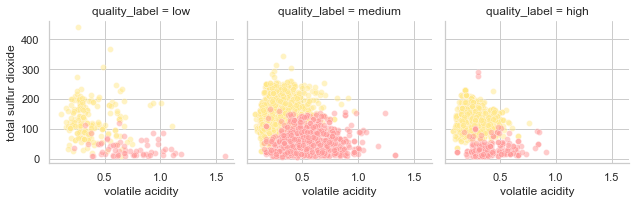

In [84]:
plot = sns.FacetGrid(data=wines, col='quality_label', hue='wine_type',palette={"red": "#FF9999", "white": "#FFE888"})
plot.map(sns.scatterplot, 'volatile acidity', 'total sulfur dioxide', alpha=0.5 )
plt.show()

## Visualizing five dimensions

Once again following a similar strategy as we followed in the previous section, to visualize data in five dimensions, we leverage various plotting components. Let’s use depth, hue and size to represent three of the data dimensions besides regular axes representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional bubble chart.

Text(0.5, 0, 'Fixed Acidity')

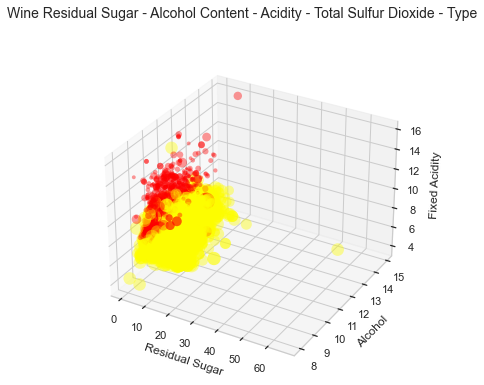

In [55]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

In [ ]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## Visualizing six dimensions

Now, let’s add another data dimension in our visualizations. We will leverage depth, hue, size and shape besides our regular two axes to depict all the six data dimensions.

Text(0.5, 0, 'Fixed Acidity')

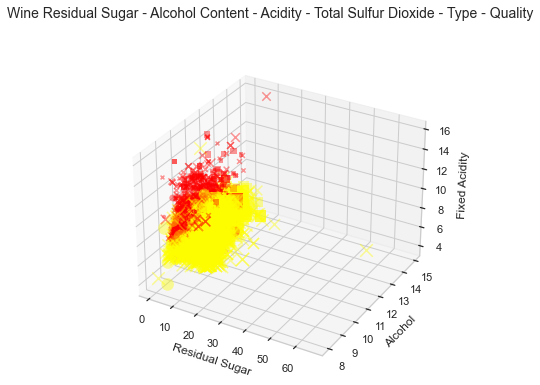

In [64]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

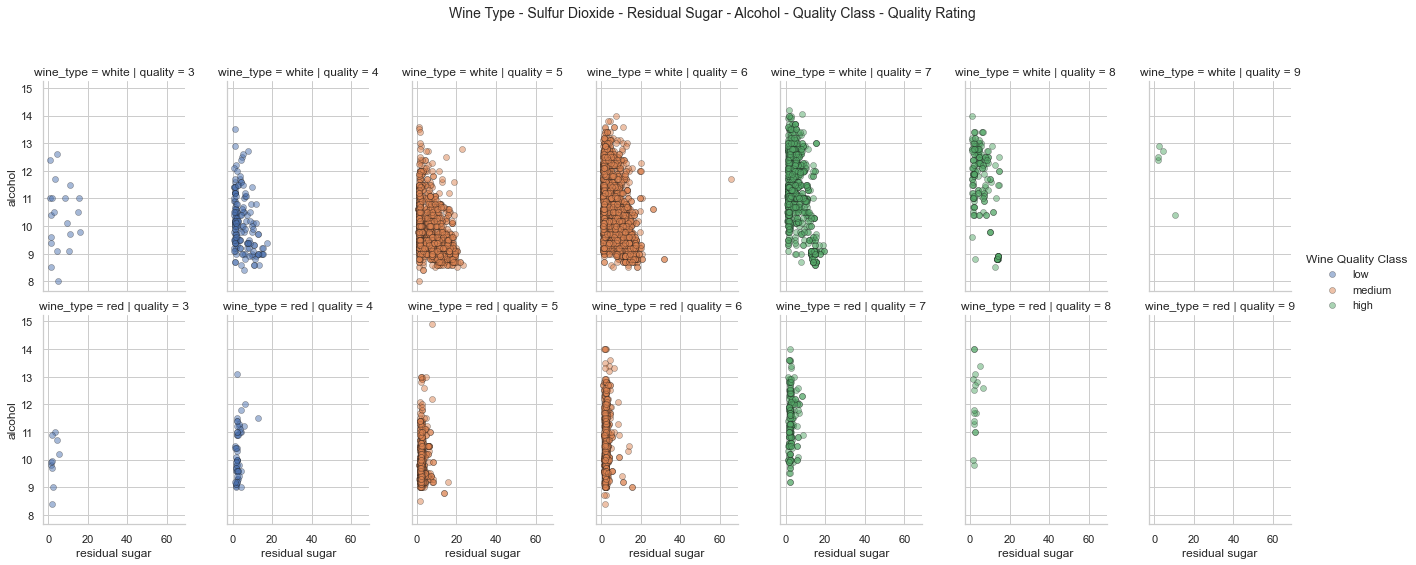

In [99]:
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', height=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')